In [19]:
import warnings
warnings.filterwarnings('ignore')
import netCDF4 as nc
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import rioxarray as rxr
import seaborn as sns
import geopandas as gpd
import earthpy as et

fn = './data_daily/*.nc4'

In [20]:
ds = xr.open_mfdataset(fn)
ds

,Array,Chunk
Bytes,179.92 MB,98.21 kB
Shape,"(1832, 248, 99)","(1, 248, 99)"
Count,5496 Tasks,1832 Chunks
Type,float32,numpy.ndarray


In [3]:
print(ds.variables.keys())

KeysView(Frozen({'precipitationCal': <xarray.Variable (time: 1567, lon: 248, lat: 99)>
dask.array<concatenate, shape=(1567, 248, 99), dtype=float32, chunksize=(1, 248, 99), chunktype=numpy.ndarray>
Attributes:
    units:         mm
    long_name:     Daily accumulated precipitation (combined microwave-IR) es...
    origname:      precipitationCal
    fullnamepath:  /precipitationCal, 'lat': <xarray.IndexVariable 'lat' (lat: 99)>
array([34.850002, 34.95    , 35.05    , 35.149998, 35.250004, 35.350002,
       35.45    , 35.55    , 35.649998, 35.750004, 35.850002, 35.95    ,
       36.05    , 36.149998, 36.250004, 36.350002, 36.45    , 36.55    ,
       36.649998, 36.750004, 36.850002, 36.95    , 37.05    , 37.149998,
       37.250004, 37.350002, 37.45    , 37.55    , 37.649998, 37.750004,
       37.850002, 37.95    , 38.05    , 38.150005, 38.249996, 38.350002,
       38.45001 , 38.55    , 38.650005, 38.749996, 38.850002, 38.95001 ,
       39.05    , 39.150005, 39.249996, 39.350002, 39.45

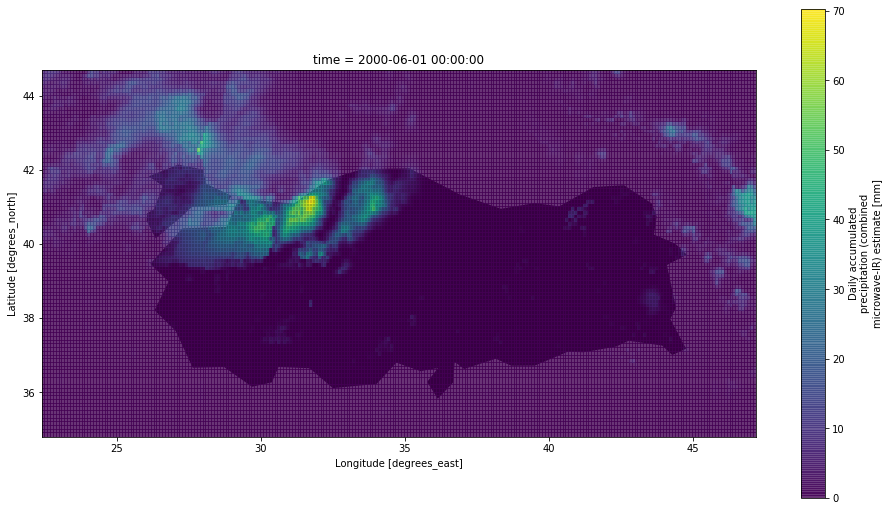

In [40]:
fig,ax = plt.subplots(figsize=(16,9))
countries = gpd.read_file(
      gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Turkey"].plot(color="black",
                                                 ax=ax)
ds.precipitationCal[0].plot(ax=ax, x='lon', y='lat', alpha=0.8)
plt.show()

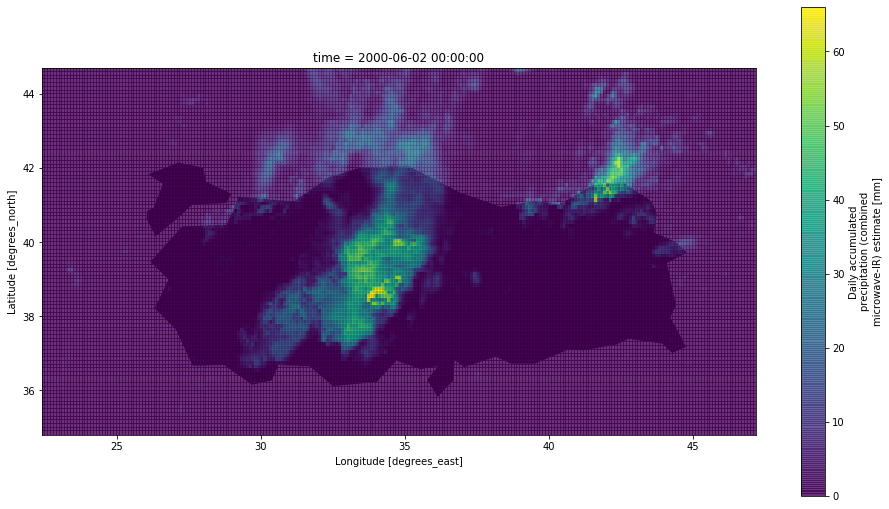

In [44]:
fig,ax = plt.subplots(figsize=(16,9))
countries = gpd.read_file(
      gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Turkey"].plot(color="black",
                                              ax=ax)
ds.precipitationCal[1].plot(ax=ax, x='lon', y='lat', alpha=0.8)
plt.show()

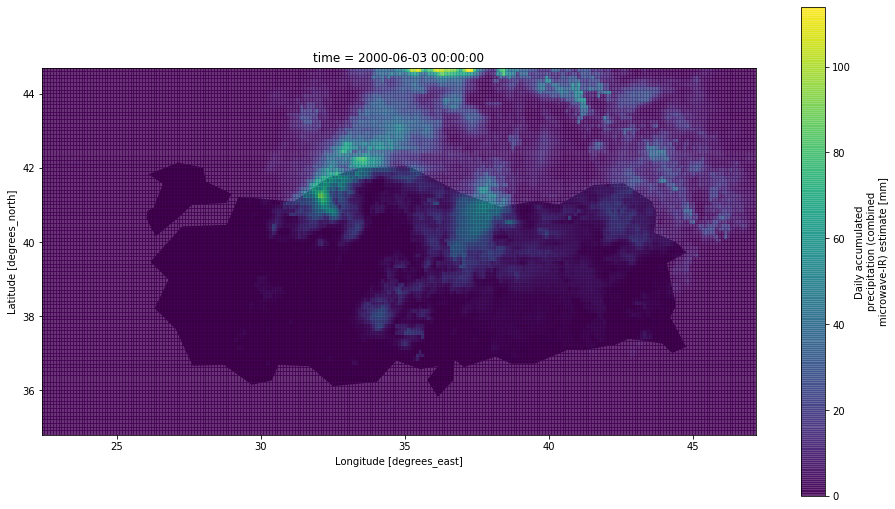

In [63]:
fig,ax = plt.subplots(figsize=(16,9))
countries = gpd.read_file(
      gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Turkey"].plot(color="black",
                                              ax=ax)
ds.precipitationCal[2].plot(ax=ax, x='lon', y='lat', alpha=0.8)
plt.show()

In [46]:
print("The min and max precipitation value at 20000601 is (in mm):",
      ds.precipitationCal[0].values.min(),
      ds.precipitationCal[0].values.max())

The min and max precipitation value at 20000601 is (in mm): 0.0 70.31248


In [47]:
print("The min and max precipitation value at 20000602 is (in mm):",
      ds.precipitationCal[1].values.min(),
      ds.precipitationCal[1].values.max())


The min and max precipitation value at 20000602 is (in mm): 0.0 66.068146


In [48]:
max_in_2000 = ds.precipitationCal.sel(time=slice('2000-01-01', '2000-12-31')).values.max()
print("The max precipitation value at 2000 is (in mm):",
      max_in_2000)

The max precipitation value at 2000 is (in mm): 836.71924


In [49]:
avg_in_2000 = ds.precipitationCal.sel(time=slice('2000-01-01', '2000-12-31')).values.mean()
print("The average precipitation value at 2000 is (in mm):",
      avg_in_2000)

The average precipitation value at 2000 is (in mm): 1.3023485


In [50]:
max_in_2001 = ds.precipitationCal.sel(time=slice('2001-01-01', '2001-12-31')).values.max()
print("The max precipitation value at 2001 is (in mm):",
      max_in_2001)

The max precipitation value at 2001 is (in mm): 872.77106


In [51]:
avg_in_2001 = ds.precipitationCal.sel(time=slice('2001-01-01', '2001-12-31')).values.mean()
print("The average precipitation value at 2001 is (in mm):",
      avg_in_2001)

The average precipitation value at 2001 is (in mm): 1.9591699


In [52]:
max_in_2002 = ds.precipitationCal.sel(time=slice('2002-01-01', '2002-12-31')).values.max()
print("The max precipitation value at 2002 is (in mm):",
      max_in_2002)

The max precipitation value at 2002 is (in mm): 551.0801


In [53]:
avg_in_2002 = ds.precipitationCal.sel(time=slice('2002-01-01', '2002-12-31')).values.mean()
print("The average precipitation value at 2002 is (in mm):",
      avg_in_2002)

The average precipitation value at 2002 is (in mm): 2.0362859


In [54]:
ds_pre_area_mean = ds.precipitationCal.mean(dim=('lon','lat'))

ConversionError: Failed to convert value(s) to axis units: '2000'

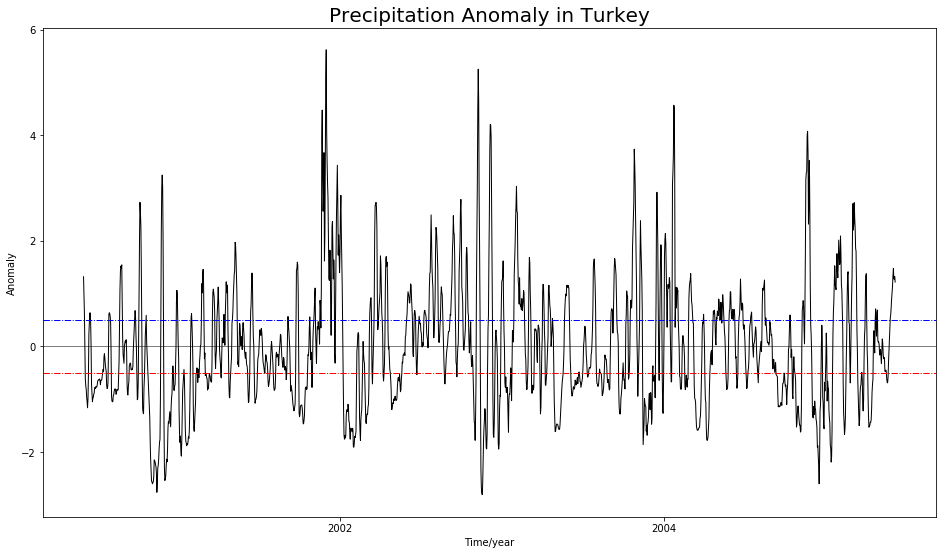

In [56]:
gb_pre = ds_pre_area_mean.groupby('time.month')
ds_pre_anom = gb_pre - gb_pre.mean(dim='time')
ds_pre_anom_rl = ds_pre_anom.rolling(time=6, center=True).mean()

fig,ax = plt.subplots(figsize=(16,9))
ds_pre_anom_rl.plot(ax=ax, linewidth=1, color='k')

ax.set_xlabel('Time/year')
ax.set_title('Precipitation Anomaly in Turkey',fontsize=20)
ax.set_ylabel('Anomaly')

plt.axhline(y=0.5,linestyle='-.',linewidth=1,color='blue')
plt.axhline(y=-0.5,linestyle='-.',linewidth=1,color='red')
plt.axhline(y=0,linewidth=0.5,color='k')

ax.set_xlim(['2000','2005'])